In [2]:
# prepare environment
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from math import sqrt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pydataset import data

In [4]:
#1 load tips dataset
df = data('tips')
df['tip_percent'] = df.tip/df.total_bill

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2


In [7]:
x = df.total_bill
y = df.tip_percent

In [8]:
#2a,b
ols_model = ols('y~x',data=df).fit()

df['yhat'] = ols_model.predict(pd.DataFrame(x))

In [9]:
df.head(1)
df['residual'] = df['yhat']-df['tip_percent']
df['residual2'] = df.residual **2
df.head(1)

,total_bill,tip,sex,smoker,day,time,size,tip_percent,yhat,residual,residual2
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,0.167298,0.107851,0.011632


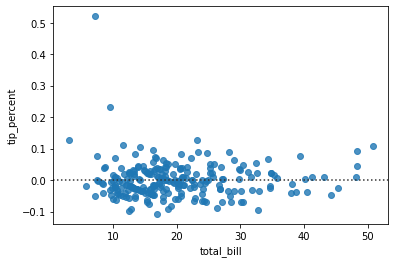

In [10]:
#4 plot residuals
sns.residplot(x,y)

In [11]:
#5 regression errors, SSE, ESS, TSS, MSE, RMSE
SSE = sum(df['residual2'])
ESS = sum((df.yhat - df.tip_percent.mean())**2)
TSS = ESS + SSE
MSE = SSE/len(df)
RMSE = sqrt(MSE)
print(SSE,MSE,RMSE)

0.8024176502412163 0.0032885969272180996 0.05734628956801041


In [12]:
df_baseline = df[['total_bill','tip_percent']]
df_baseline['yhat'] = df_baseline['tip_percent'].mean()
df_baseline['residual'] = df_baseline['yhat'] - df_baseline['tip_percent']
df_baseline['residual2'] = df_baseline['residual'] ** 2
df_baseline.head(1)

,total_bill,tip_percent,yhat,residual,residual2
1,16.99,0.059447,0.160803,0.101356,0.010273


In [13]:
#regression errors
SSE_bl = sum(df_baseline['residual2'])
MSE_bl = SSE_bl/len(df_baseline)
RMSE_bl = sqrt(MSE_bl)
print(SSE_bl,MSE_bl,RMSE_bl)

0.9063448323305451 0.0037145280013546928 0.060946927743362855


In [14]:
r2 = ESS/TSS
r2

0.11466627091820376

In [20]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487


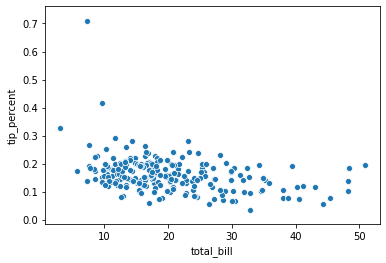

In [15]:
a = sns.scatterplot(x='total_bill',y='tip_percent',data=df)

In [16]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     31.34
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           5.85e-08
Time:                        09:43:01   Log-Likelihood:                 351.29
No. Observations:                 244   AIC:                            -698.6
Df Residuals:                     242   BIC:                            -691.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2068      0.009     22.975      0.000       0.189       0.224
x             -0.0023      0.000     -5.599      0.000      -0.003      -0.002
==============================================================================
Omnibus:                      224.802   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7863.442
Skew:                           3.420   Prob(JB):                         0.00
Kurtosis:                      29.957   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

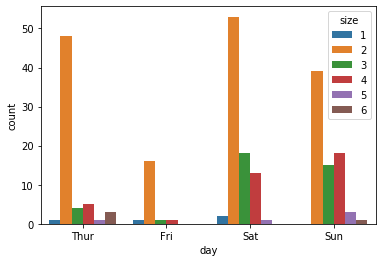

In [18]:
order = ['Thur','Fri','Sat','Sun']
sns.countplot(x='day',hue='size',data=df,order=order)

In [39]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual2,tip_percent
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487,0.146808
